In [25]:
#| echo: false

import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_formats = ['svg']

# Numerische Integration

**🏁 Ziel:** Approximiere $\int_a^b f(x) \, dx$ für eine Funktion $f$.

**💡 Idee:** Funktion zunächst interpolieren und dann dieses Interpolationspolynom integrieren

## Quadraturformeln

Sei $\Xi = \{\xi_0, \xi_1, \ldots, \xi_N\} \subset [a,b]$ eine Menge von Stützstellen und $w_\xi$ die zugehörigen Gewichte. Dann ist die Quadraturformel:

$$
Q_\Xi(f)=\sum_{\xi \in \Xi} w_\xi f(\xi)
$$

### Ordnung

$Q_\Xi$ hat Ordnung $k$, wenn für alle Polynome $P$ mit $\deg(P) \leq k$ gilt:

$$
\int_a^b P(x) \, dx = Q_\Xi(P) \quad Q_\Xi \text{ ist exakt}
$$

### Newton-Cotes-Formeln

(*Quadratur zu äquidistanten Stützstellen*)

$$
\begin{aligned}
N = 1: \quad & I_1(f) = \frac{b-a}{2} \left( f(a) + f(b) \right) \hspace{2cm} & \textit{Trapezregel} \\[1.5em]
N = 2: \quad & I_2(f) = \frac{b-a}{6} \left( f(a) + 4f\left(\frac{a+b}{2}\right) + f(b) \right) \hspace{1.2cm} & \textit{Simpsonregel} \\[1.5em]
N = 3: \quad & w_0 = w_3 = \frac{b-a}{8},\quad w_1 = w_2 = \frac{3(b-a)}{8} \hspace{2cm} & \textit{Newton’sche } \frac{3}{8}\text{-Regel} \\[1.5em]
N = 4: \quad & w_0 = w_4 = \frac{7(b-a)}{90},\quad w_1 = w_3 = \frac{32(b-a)}{90},\quad w_2 = \frac{12(b-a)}{90} \hspace{0.5cm} & \textit{Milne-Regel}
\end{aligned}
$$

### Bemerkungen

- Es gibt zu allen Zerlegungen $\Xi \subset [a,b]$ mit $\#\Xi=N+1$ eine Quadraturformel $Q_\Xi$, welche exakt ist für alle Polynome $P$ mit $\deg(P) \leq N$.
    - [*Lagrarge Polynom:*]{.mark}
    $$
    w_\xi = \int_a^b L_\xi(t) \, dt \quad \text{mit} \quad L_\xi(t) = \prod_{\eta \in \Xi, \ \eta \neq \xi} \frac{t - \eta}{\xi - \eta}
    $$
- Die Quadraturformel hat maximale Ordnung $2N-1$ (*Gauß-Quadratur*)
- **⚠️ Probleme:**
    - Äquidistante Stützstellen (Newton-Cotes) führen für $N>5$ teilweise zu negativen Gewichten
    - Gauß-Quadratur benötigt spezielle Stüzstellen. Keine adaptive "Wiederverwertung" möglich.

## Summierte Quadraturformel

**💡 Idee:** Zerlege Intervall $[a,b]=\omega_1 \cup \dots \cup \omega_N$, $\omega_n=[a+(n-1)h, \ a + nh]$ mit äquidistanter Schrittweite $h=\frac{b-a}N$ und verwende die Quadraturformel in jedem Intervall $\omega_N$.

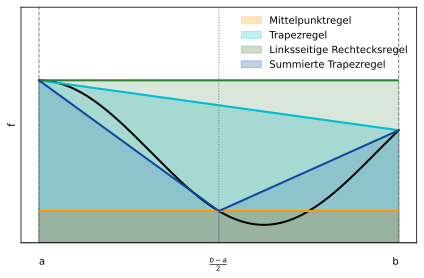

In [37]:
#| label: fig-quadratur
#| echo: false
#| fig-cap: "Verschiedene Quadraturformeln"

from matplotlib.patches import Polygon, Rectangle

N = 2

# Intervall und Beispiel-Funktion (trigonometrisch, Minimum in der Mitte)
a, b = 0.0, 6.0
def f(x):
    # cos mit zwei Endpunkts-Maxima und Mittelwert-Offset, damit alles > 0 bleibt
    return 1.0 + 0.8 * np.cos(2*np.pi*(x - a)/(b - a + 1.5))

# Plot-Vorbereitung
x = np.linspace(a, b, 800)
y = f(x)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, y, color='black', lw=2, label='f(x)')

# Achsen, Hilfslinien und Labels
ax.axhline(0, color='black', lw=1)
ax.axvline(a, color='gray', ls='--', lw=1)
ax.axvline(b, color='gray', ls='--', lw=1)
xm = 0.5*(a+b)
ax.axvline(xm, color='gray', ls=':', lw=1)

# 1) Trapezregel (ein Trapez über [a,b])
fa, fb = f(a), f(b)
trap_color = '#00bcd4'
trap_poly = Polygon([[a, 0], [a, fa], [b, fb], [b, 0]],
                    closed=True, facecolor=trap_color, edgecolor=trap_color, alpha=0.25, lw=2, label='Trapezregel')
ax.add_patch(trap_poly)
ax.plot([a, b], [fa, fb], color=trap_color, lw=2)

# 2) Mittelpunktregel (ein Rechteck mit Höhe f((a+b)/2))
mid_color = '#ff9800'
fm = f(xm)
mid_rect = Rectangle((a, 0), (b - a), fm,
                     facecolor=mid_color, edgecolor=mid_color, alpha=0.25, lw=2, label='Mittelpunktregel')
ax.add_patch(mid_rect)
ax.hlines(fm, a, b, colors=mid_color, lw=2)

# 3) Linksseitige Rechtecksregel
left_color = '#2e7d32'
rect = Rectangle((a, 0), b-a, f(a), facecolor=left_color, edgecolor=left_color, alpha=0.18, lw=1.2)
ax.add_patch(rect)
# Oberkanten der linken Rechtecke betonen
ax.hlines(f(a), a, b, colors=left_color, lw=2)

# 4) Summierte Trapezregel (zusammengesetzt mit denselben Unterintervallen)
xi = np.linspace(a, b, N + 1)
yi = f(xi)
sumtrap_color = '#0d47a1'
ax.plot(xi, yi, color=sumtrap_color, lw=2, label='Summierte Trapezregel')
for i in range(N):
    poly = Polygon([[xi[i], 0], [xi[i], yi[i]], [xi[i+1], yi[i+1]], [xi[i+1], 0]],
                   closed=True, facecolor=sumtrap_color, edgecolor=sumtrap_color, alpha=0.15, lw=1.2)
    ax.add_patch(poly)

# Legende mit Proxy-Artists, damit Flächen in der Legende erscheinen
proxies = [
#    plt.Line2D([0], [0], color='black', lw=2, label='f(x)'),
    Rectangle((0, 0), 1, 1, facecolor=mid_color, edgecolor=mid_color, alpha=0.25, label='Mittelpunktregel'),
    Rectangle((0, 0), 1, 1, facecolor=trap_color, edgecolor=trap_color, alpha=0.25, label='Trapezregel'),
    Rectangle((0, 0), 1, 1, facecolor=left_color, edgecolor=left_color, alpha=0.25, label='Linksseitige Rechtecksregel'),
    Rectangle((0, 0), 1, 1, facecolor=sumtrap_color, edgecolor=sumtrap_color, alpha=0.25, label='Summierte Trapezregel'),
]
ax.legend(handles=proxies, loc='upper right', frameon=False)

# Kosmetik
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(a - 0.05*(b - a), b + 0.05*(b - a))
ax.set_ylim(0, max(y)*1.45)
ax.set_ylabel('f')
ax.grid(True, alpha=0.2, linestyle='--')
ax.text(a, -0.06*ax.get_ylim()[1], 'a', ha='left', va='top')
ax.text(b, -0.06*ax.get_ylim()[1], 'b', ha='right', va='top')
ax.text(xm, -0.06*ax.get_ylim()[1], '$\\frac{b-a}{2}$', ha='center', va='top')

plt.tight_layout()
plt.show()

### Summierte Trapezregel

Für $N \in \mathbb{N}$ seien $h := \frac{b-a}{N}$ und

$$
\Xi := \{\xi_n = a + n h : n = 0, \ldots, N\}.
$$

Definiere dann zu $f \in C[a,b]$ die *Quadraturformel*:

$$
T_N(f) := \sum_{n=1}^N \frac{h}{2} \left( f(\xi_{n-1}) + f(\xi_n) \right)
= \frac{h}{2} f(a) + h \sum_{n=1}^{N-1} f(\xi_n) + \frac{h}{2} f(b)
$$